### Introductions
COVID-19 is a disease that has now become a global pandemic. The condition is becoming increasingly worrying because until now there is still no effective vaccine for the virus that causes COVID-19. Governments in various countries generally swiftly form task force units to handle the spread of COVID-19 in the community, including the government in Indonesia.

One form of action taken by the government is to collect and provide data on the growth of COVID-19 cases to the public. The case growth data is often also equipped with dashboards and supporting visualization charts in the hope that the public can understand the information more easily. For example, the covid19.go.id portal created by the National COVID-19 Handling Task Force and the PIKOBAR portal belonging to the West Java Provincial government. As well as many other COVID-19 data portals provided by each local government.

The data you use is taken directly from the API (Application Programming Interface) available at 'covid19.go.id'

In [1]:
# Access API Covid 19.go.id
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [2]:
print(resp)

<Response [200]>


In [4]:
# Access Metadata
print(resp.headers)

{'Server': 'nginx', 'Date': 'Tue, 03 Aug 2021 06:24:30 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Tue, 03 Aug 2021 06:19:38 GMT', 'ETag': 'W/"6108dffa-30faa"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [6]:
# Extracting Json contents
cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


### Data analysis

In [8]:
print('Update date for case addition data :', cov_id_update['penambahan']['tanggal'])
print('Number of recovered cases:', cov_id_update['penambahan']['jumlah_sembuh'])
print('Number of additional deaths:', cov_id_update['penambahan']['jumlah_meninggal'])
print('Total number of positive cases to date:', cov_id_update['total']['jumlah_positif'])
print('Total number of deaths to date:', cov_id_update['total']['jumlah_meninggal'])

Update date for case addition data : 2021-08-02
Number of recovered cases: 32807
Number of additional deaths: 1568
Total number of positive cases to date: 3462800
Total number of deaths to date: 97291


In [9]:
# Data Covid of Jawa Barat
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [10]:
print('Main element names:\n', cov_jabar_raw.keys())
print('\nThe total number of COVID-19 cases in West Java : %d' %cov_jabar_raw['kasus_total'])
print('Percentage of deaths from COVID-19 in West Java : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Percentage of cure rate from COVID-19 in West Java: %f.2%%' %cov_jabar_raw['sembuh_persen'])

Main element names:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

The total number of COVID-19 cases in West Java : 614138
Percentage of deaths from COVID-19 in West Java : 1.577333.2%
Percentage of cure rate from COVID-19 in West Java: 79.103231.2%


In [12]:
import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nThe top five data of cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       519 non-null    int64
 1   KASUS                         519 non-null    int64
 2   MENINGGAL                     519 non-null    int64
 3   SEMBUH                        519 non-null    int64
 4   DIRAWAT_OR_ISOLASI            519 non-null    int64
 5   AKUMULASI_KASUS               519 non-null    int64
 6   AKUMULASI_SEMBUH              519 non-null    int64
 7   AKUMULASI_MENINGGAL           519 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  519 non-null    int64
dtypes: int64(9)
memory usage: 36.6 KB
Info cov_jabar:
 None

The top five data of cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0

#### Column Standarisation

In [13]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
if item.startswith('AKUMULASI')
or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('The top five data of cov_jabar:\n', cov_jabar_tidy.head())

The top five data of cov_jabar:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


<Figure size 432x288 with 0 Axes>

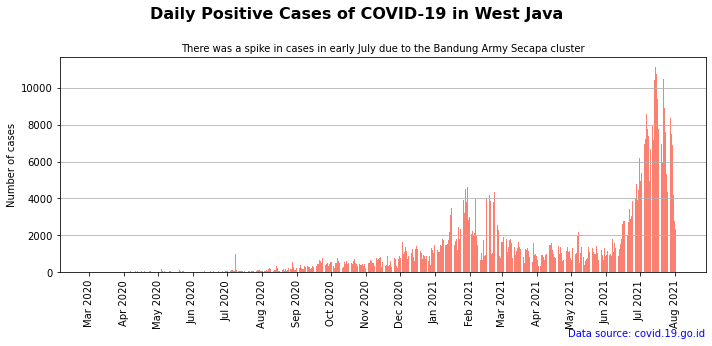

In [22]:
# Create a Graphic
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Daily Positive Cases of COVID-19 in West Java',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('There was a spike in cases in early July due to the Bandung Army Secapa cluster',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Number of cases')
ax.text(1, -0.3, 'Data source: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

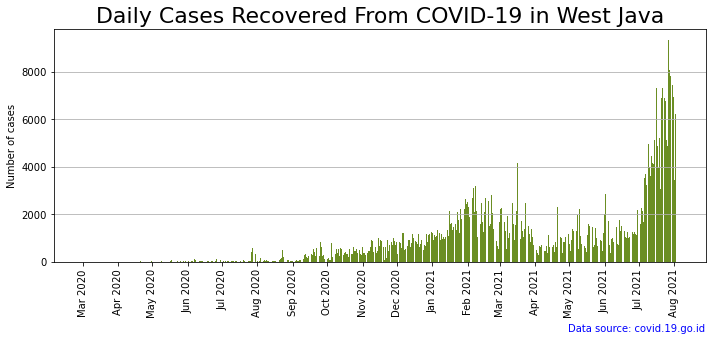

In [23]:
# Graphics for Cure Cases

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Daily Cases Recovered From COVID-19 in West Java',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Number of cases')
ax.text(1, -0.3, 'Data source: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

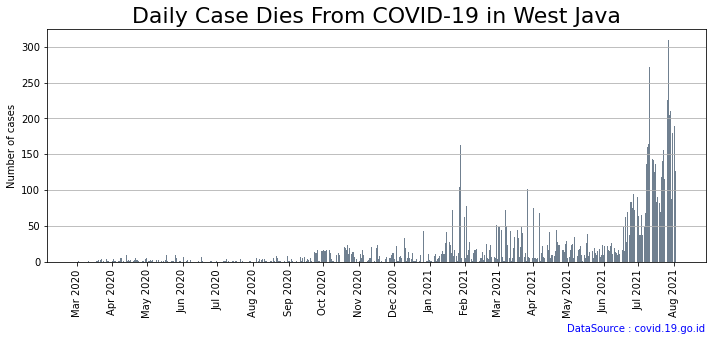

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Daily Case Dies From COVID-19 in West Java',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Number of cases')
ax.text(1, -0.3, 'DataSource : covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Percentage of cases in weekly time span

In [26]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nThe top five data of cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     75 non-null     int64
 1   pekan_ke  75 non-null     int64
 2   jumlah    75 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

The top five data of cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     131


In [27]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Top ten data:\n', cov_jabar_pekanan.head(10))

Top ten data:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     131               104       False
5   2020        15     235               131       False
6   2020        16     277               235       False
7   2020        17     216               277        True
8   2020        18     156               216        True
9   2020        19     367               156       False


<Figure size 432x288 with 0 Axes>

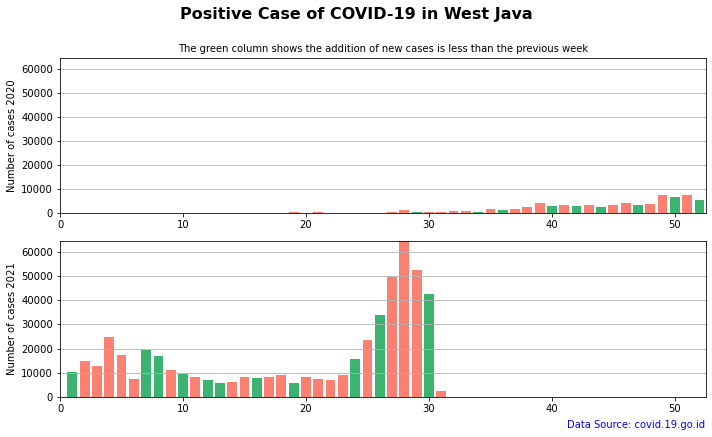

In [29]:
# Create Bar Chart
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Positive Case of COVID-19 in West Java',
y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]], x='pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('The green column shows the addition of new cases is less than the previous week', fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Data Source: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Number of cases %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

#### Patterns and Dynamics

In [30]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
514 2021-07-29           127363            461453                 9096
515 2021-07-30           126752            468888                 9184
516 2021-07-31           123840            475825                 9363
517 2021-08-01           122968            479277                 9552
518 2021-08-02           118970            485489                 9679


In [31]:
#### Create a Line Chart

<Figure size 432x288 with 0 Axes>

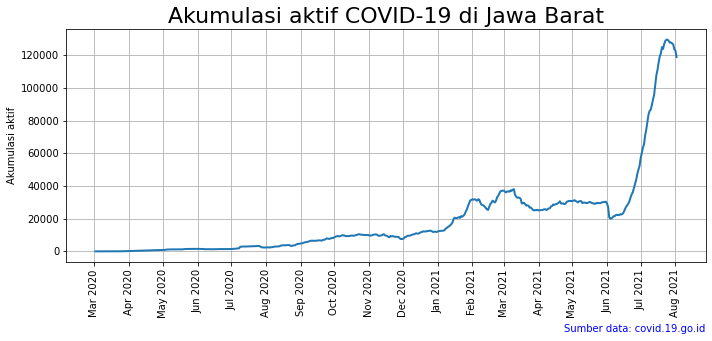

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

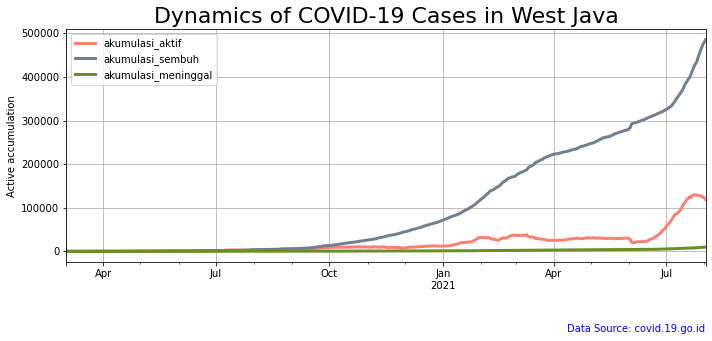

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dynamics of COVID-19 Cases in West Java',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Active accumulation')
ax.text(1, -0.3, 'Data Source: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()